In [ ]:
print("Lets go")

Peki problemimiz düz bir çizgi şeklinde ifade edilemiyorsa ne yapmalıyız?

In [2]:
import pandas
from matplotlib import pyplot as plotter

In [3]:
sale_dataset = pandas.read_csv('data/experience_sale_dataset')

sale_dataset.head()

YearsExperience  HouseSales
0              3.2          27
1              8.2          30
2              5.7          31
3              7.5          36
4              1.5          16

In [4]:
print(sale_dataset.shape)

(15, 2)


In [5]:
sale_dataset.describe()

YearsExperience  HouseSales
count        15.000000   15.000000
mean          3.790000   22.666667
std           2.927346    9.802818
min           0.100000    6.000000
25%           1.250000   15.500000
50%           3.200000   22.000000
75%           6.225000   31.000000
max           8.500000   36.000000

(array([2., 2., 2., 0., 0., 2., 1., 1., 0., 0., 1., 1., 0., 1., 2.]),
 array([0.1 , 0.66, 1.22, 1.78, 2.34, 2.9 , 3.46, 4.02, 4.58, 5.14, 5.7 ,
        6.26, 6.82, 7.38, 7.94, 8.5 ]),
 <BarContainer object of 15 artists>)

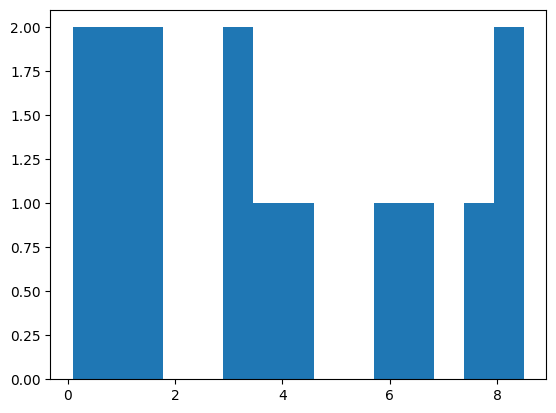

In [6]:
# İki özelliğin de dağılımına bakalım

plotter.hist(sale_dataset["YearsExperience"], bins=15)

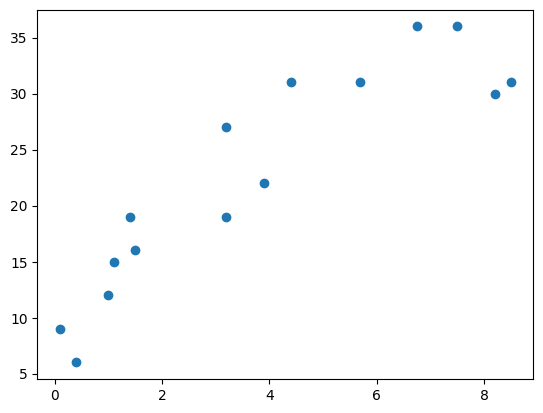

In [7]:
# Görselleştirme

plotter.scatter(x = sale_dataset["YearsExperience"], y = sale_dataset["HouseSales"])

In [8]:
# Önce Bir Lineer Regresyon Deneyelim ^_^

from sklearn.linear_model import LinearRegression

reg_model = LinearRegression().fit(sale_dataset[["YearsExperience"]],
                                   sale_dataset[["HouseSales"]])

reg_model.score(sale_dataset[["YearsExperience"]], sale_dataset[["HouseSales"]])

0.8137110174932514

In [9]:
reg_model.coef_

array([[3.02073001]])

In [10]:
reg_model.intercept_

array([11.21809993])

In [11]:
predictions = reg_model.predict(sale_dataset[["YearsExperience"]])

In [12]:
residuler = []
for x in range(len(predictions)):
    residuler.append(sale_dataset["HouseSales"][x] - predictions[x])

In [13]:
from sklearn.metrics import r2_score

r2_score_linear = r2_score(sale_dataset["HouseSales"], predictions)

In [14]:
r2_score_linear

0.8137110174932514

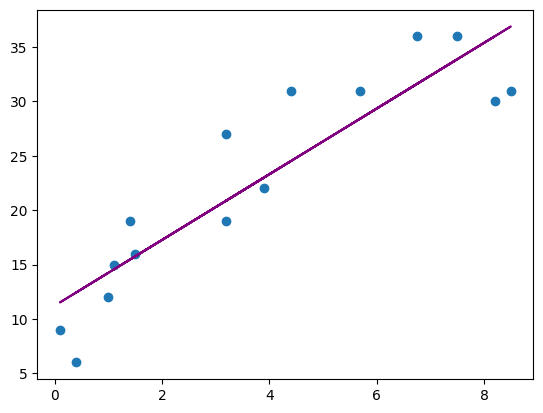

In [15]:
plotter.scatter(x = sale_dataset["YearsExperience"], 
                y = sale_dataset["HouseSales"])

plotter.plot(sale_dataset["YearsExperience"], 
             predictions, 
             color='purple')

In [16]:
residuler

[array([6.11556404]),
 array([-5.98808601]),
 array([2.56373901]),
 array([2.126425]),
 array([0.25080506]),
 array([0.45909706]),
 array([4.3919725]),
 array([-5.89430501]),
 array([-1.88443596]),
 array([-0.99894697]),
 array([-2.52017293]),
 array([-2.23882994]),
 array([-6.42639193]),
 array([6.49068803]),
 array([3.55287806])]

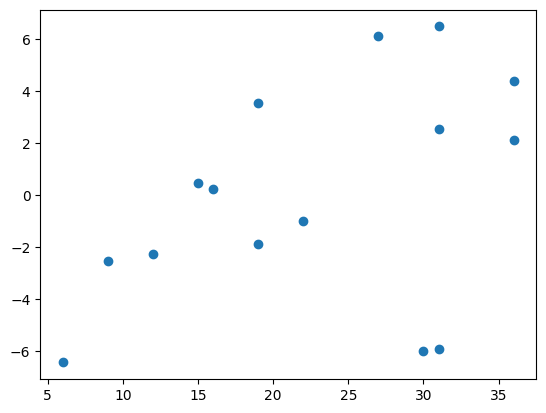

In [17]:
# Residüleri Görselleştirelim

plotter.scatter(x = sale_dataset["HouseSales"], 
                y = residuler)

Daha İyi Olabilir mi?

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(2)
transformed_data = poly_model.fit_transform(sale_dataset[["YearsExperience"]],
                                            sale_dataset[["HouseSales"]])

In [19]:
transformed_data

array([[1.00000e+00, 3.20000e+00, 1.02400e+01],
       [1.00000e+00, 8.20000e+00, 6.72400e+01],
       [1.00000e+00, 5.70000e+00, 3.24900e+01],
       [1.00000e+00, 7.50000e+00, 5.62500e+01],
       [1.00000e+00, 1.50000e+00, 2.25000e+00],
       [1.00000e+00, 1.10000e+00, 1.21000e+00],
       [1.00000e+00, 6.75000e+00, 4.55625e+01],
       [1.00000e+00, 8.50000e+00, 7.22500e+01],
       [1.00000e+00, 3.20000e+00, 1.02400e+01],
       [1.00000e+00, 3.90000e+00, 1.52100e+01],
       [1.00000e+00, 1.00000e-01, 1.00000e-02],
       [1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 4.00000e-01, 1.60000e-01],
       [1.00000e+00, 4.40000e+00, 1.93600e+01],
       [1.00000e+00, 1.40000e+00, 1.96000e+00]])

In [20]:
from sklearn.linear_model import LinearRegression

quadratic_model = LinearRegression().fit(transformed_data, sale_dataset[["HouseSales"]])

In [21]:
quadratic_model.intercept_

array([6.45196075])

In [22]:
quadratic_model.coef_

array([[ 0.        ,  7.06439652, -0.4721974 ]])

In [23]:
# Öngörümüzü Yapalım

predictions_quadratic = quadratic_model.predict(transformed_data)

predictions_quadratic

array([[24.22272827],
       [32.62945923],
       [31.37732748],
       [32.87383106],
       [15.98611139],
       [13.65143807],
       [32.62214335],
       [32.38306922],
       [24.22272827],
       [26.82098477],
       [ 7.15367843],
       [13.04415987],
       [ 9.20216778],
       [28.39356383],
       [15.41660898]])

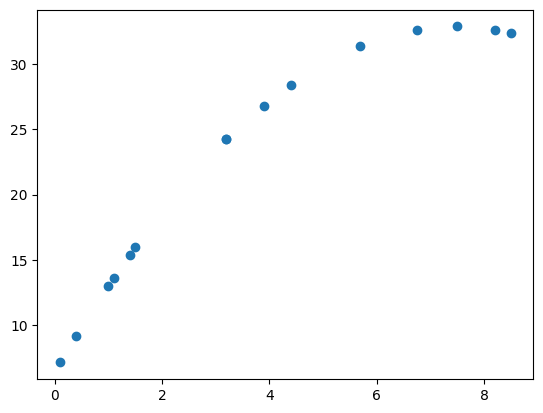

In [24]:
plotter.scatter(x = sale_dataset["YearsExperience"], 
                y = predictions_quadratic)

In [25]:
r2_score_quadratic = r2_score(sale_dataset["HouseSales"], 
                              predictions_quadratic)

r2_score_quadratic

0.9073907971182075

In [ ]:
temp = []
for x in range(len(sale_dataset["YearsExperience"])):
    temp.append([sale_dataset["YearsExperience"][x], predictions_quadratic[x]])
temp.sort(key=lambda x: x[0])

x = []
y_pred = []

for a in temp:
    x.append(a[0])
    y_pred.append(a[1])

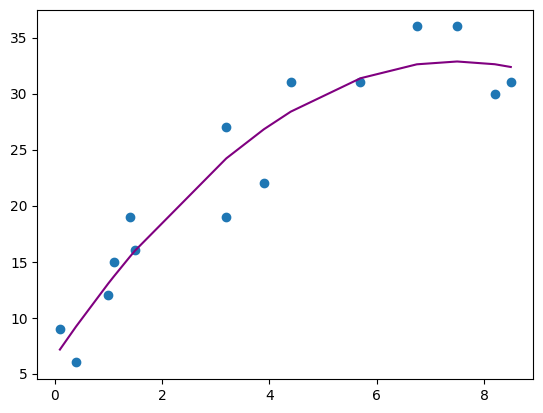

In [27]:
plotter.scatter(x = sale_dataset["YearsExperience"], 
                y = sale_dataset["HouseSales"])

plotter.plot(x, 
             y_pred, 
             color='purple')

In [30]:
residuler_quadratic = []
for x in range(len(predictions_quadratic)):
    residuler_quadratic.append(sale_dataset["HouseSales"][x] - predictions_quadratic[x])

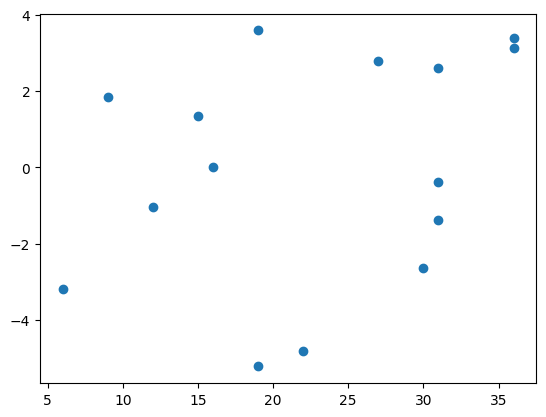

In [31]:
# Quadratic Residüleri Görelim

plotter.scatter(x = sale_dataset["HouseSales"], 
                y = residuler_quadratic)

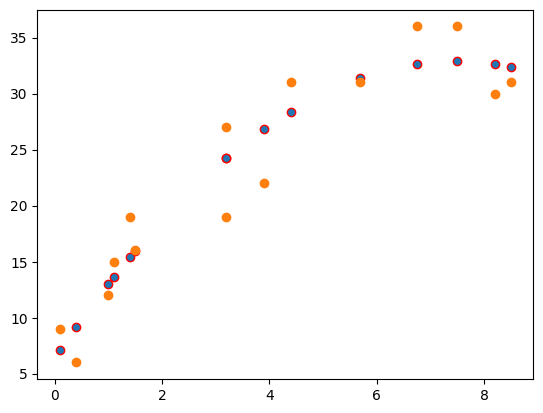

In [28]:
plotter.scatter(x = sale_dataset["YearsExperience"], 
                y = predictions_quadratic,
                edgecolors='red')
plotter.scatter(x=sale_dataset["YearsExperience"],
                y=sale_dataset["HouseSales"])

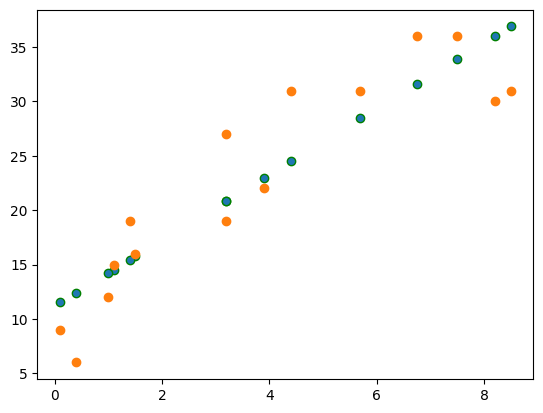

In [29]:
plotter.scatter(x=sale_dataset["YearsExperience"],
                y=predictions, 
                edgecolors='green')
plotter.scatter(x=sale_dataset["YearsExperience"],
                y=sale_dataset["HouseSales"])



* https://scikit-learn.org/